# Exploration of Tissue Specificity of GABA Receptors using the GTEX Dataset

In [1]:
import NotebookImport
from metaPCNA import *

importing IPython notebook from metaPCNA

importing IPython notebook from Imports

importing IPython notebook from Global_Parameters

In [2]:
import GTEX as GTEX

importing IPython notebook from GTEX

Using downloaded files...


In [3]:
f_win.order().tail()

LOC283914    0.41
CST2         0.42
C16orf13     0.43
GABRD        0.47
SEMA5B       0.48
Name: fraction overexpressed\n(detrended), dtype: float64

In [4]:
gabr = [g for g in rna_df.index if g.startswith('GABR')]
f = dx_rna.ix[gabr].dropna()
f.join(f_win).sort(f_win.name)

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
GABRA2,141,654,0.22,1.59e-50,-0.31
GABRA4,145,645,0.22,1.39e-46,-0.27
GABRB1,201,629,0.32,8.11e-20,-0.16
GABRP,248,684,0.36,6.25e-13,-0.15
GABRB3,218,684,0.32,1.29e-21,-0.12
GABRG1,189,635,0.30,6.76e-25,-0.12
GABRG3,273,632,0.43,7.10e-04,-0.12
GABRA3,333,602,0.55,1.02e-02,-0.10
GABRA5,281,617,0.46,2.96e-02,-0.09
GABRB2,245,678,0.36,4.92e-13,-0.06


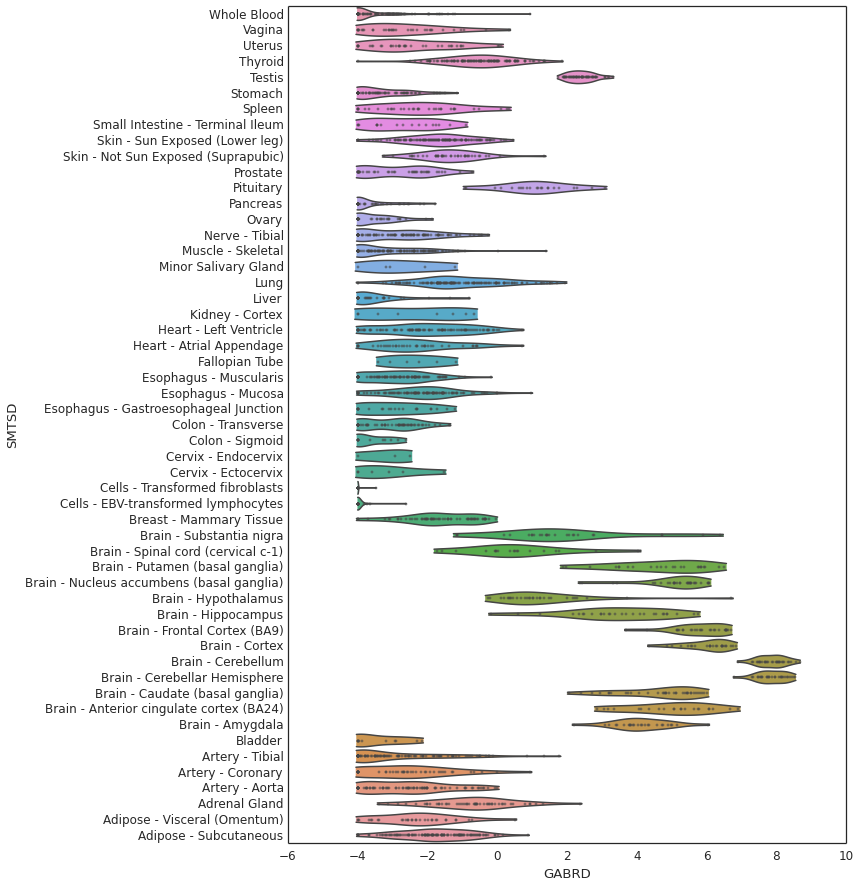

In [5]:
GTEX.plot_tissues_across_gene('GABRD', log=True)

In [6]:
gtex = np.log2(GTEX.gtex)
meta = GTEX.meta
tissue_type = GTEX.tissue_type

GABRD is highly expressed in many areas of the brain as well as in the testis. Interestingly it is the highest expressed subunit in the testis. 

In [7]:
mm =  gtex.ix[gabr].dropna().T.groupby(meta['SMTSD']).median()
mm = mm.clip_lower(-10)
mm.rank(1, ascending=False)['GABRD'].order().head(10)

SMTSD
Brain - Anterior cingulate cortex (BA24)     1
Brain - Frontal Cortex (BA9)                 1
Brain - Cortex                               1
Brain - Cerebellum                           1
Brain - Cerebellar Hemisphere                1
Brain - Caudate (basal ganglia)              1
Brain - Amygdala                             1
Brain - Putamen (basal ganglia)              1
Testis                                       1
Brain - Nucleus accumbens (basal ganglia)    2
Name: GABRD, dtype: float64

Here I'm plotting the different GABA receptors expression distribution in Testes.

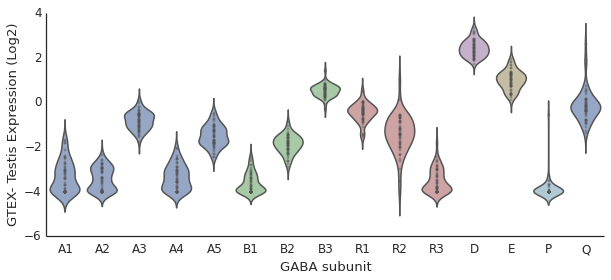

In [10]:
fig, ax = subplots(figsize=(10,4))
o = ['GABRA1','GABRA2', 'GABRA3', 'GABRA4', 'GABRA5',
     'GABRB1', 'GABRB2', 'GABRB3',
     'GABRR1', 'GABRR2', 'GABRR3',
     'GABRD','GABRE','GABRP','GABRQ']
c = sns.color_palette('muted', n_colors=7, desat=.7)

dd = gtex.ix[o, ti(tissue_type == 'Testis')].dropna(1)
sns.violinplot(dd.clip_lower(-4.).T, order=o,
               names=[s[4:] for s in o],
               inner='points', alpha=.7,
               color=[c[0]]*5 + [c[1]]*3 + [c[2]]*3 + c[3:])
ax.set_xlabel('GABA subunit')
ax.set_ylabel('GTEX- Testis Expression (Log2)')
prettify_ax(ax)
fig.savefig(FIGDIR + 'Fig_S6.pdf')

There is a correlation of subunit expression in the testis with fraction upregulated in cancer across the GABA subunits. 

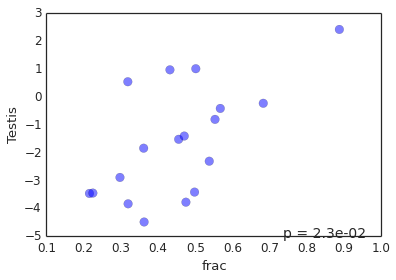

In [11]:
series_scatter(dx_rna.frac.ix[gabr],
               gtex.ix[gabr].dropna().T.groupby(meta['SMTSD']).median().ix['Testis'])

### Looking at co-expression

In the testis

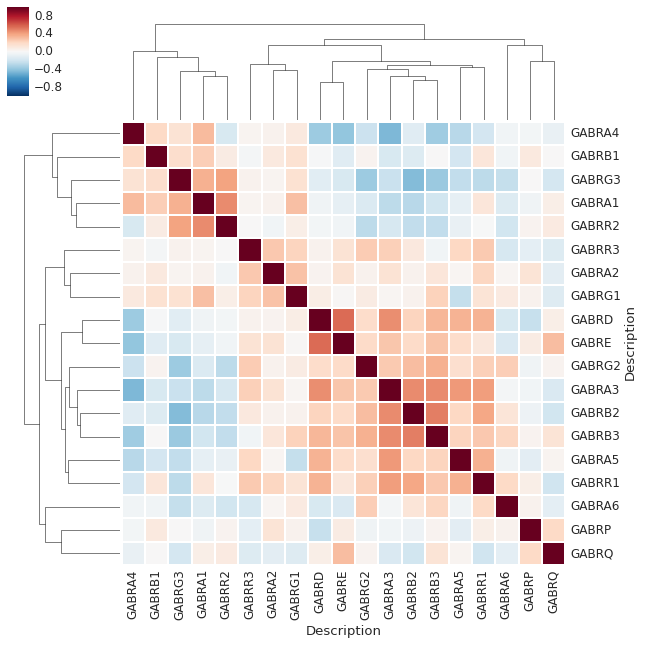

In [12]:
sns.clustermap(gtex.ix[gabr, ti(meta['SMTSD'] == 'Testis')].T.corr())

In the cerebellum

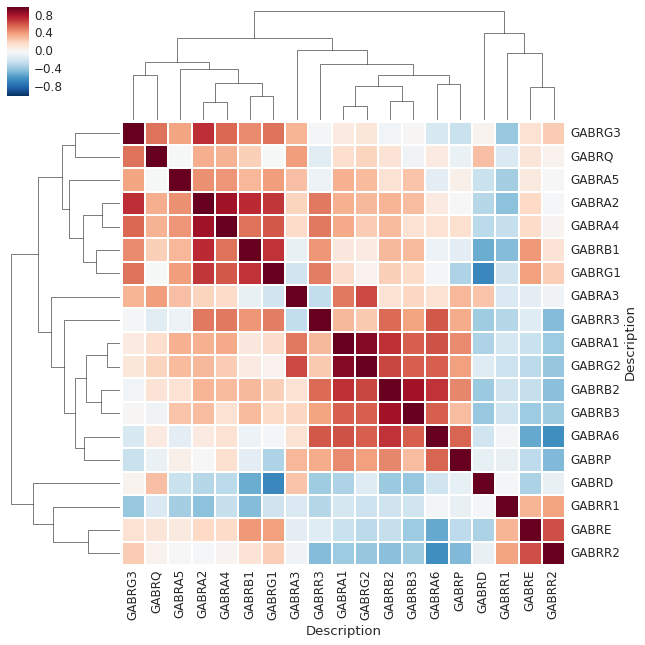

In [13]:
bella = ti(meta['SMTSD'].dropna().str.contains('Cerebellum'))
sns.clustermap(gtex.ix[gabr, bella].T.corr())

For TCGA differential expression

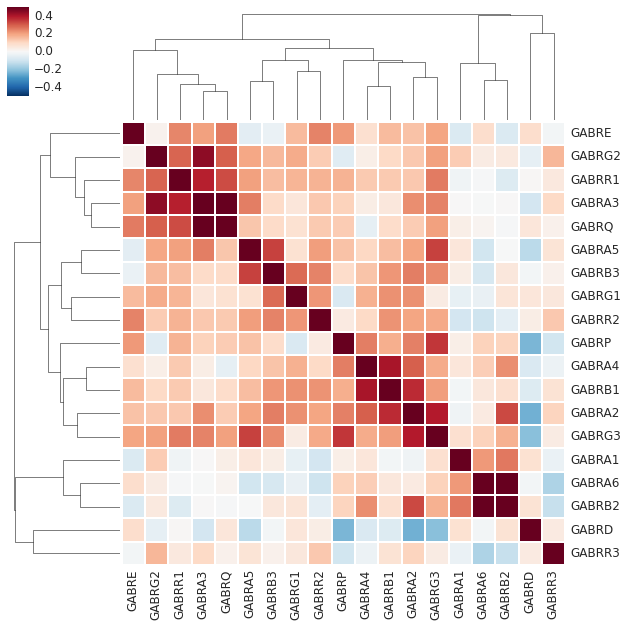

In [14]:
sns.clustermap(dx.ix[gabr].T.corr().clip(-.5,.5))